## Mitsiu Alejandro Carreño Sarabia - E23S-18014
Sigue alguno de los ejemplos de aplicaciones de un SOM

* [Detección de Atípicos](https://github.com/JustGlowing/minisom/blob/master/examples/OutliersDetection.ipynb)
* [Resolución del agente viajero](https://github.com/JustGlowing/minisom/blob/master/examples/TravellingSalesmanProblem.ipynb)
* [Cuantización de colores](https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb)

Explica para qué hace los distintos procesos

Repite el experimentos con otros datos de entrada y explica si obtuviste resultados similares


### Cuantización de colores
El objetivo del notebook es construir una matriz en la que cada renglon  representa un color en el espacio RGB y cada columna la itensidad de un color especifico.

$$ \begin{bmatrix}
r_1 & g_1 & b_1\\
\vdots & \vdots & \vdots\\
r_n & g_n & b_n
\end{bmatrix} $$

Dicha matriz se usara para entrenar un mapa auto-organizado que cuantice los colores de una imágen y genere colores similares segmentando la imagen en áreas.

(76500, 3)
Training.....
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.47893401036823646
Quantization...
Building new image...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


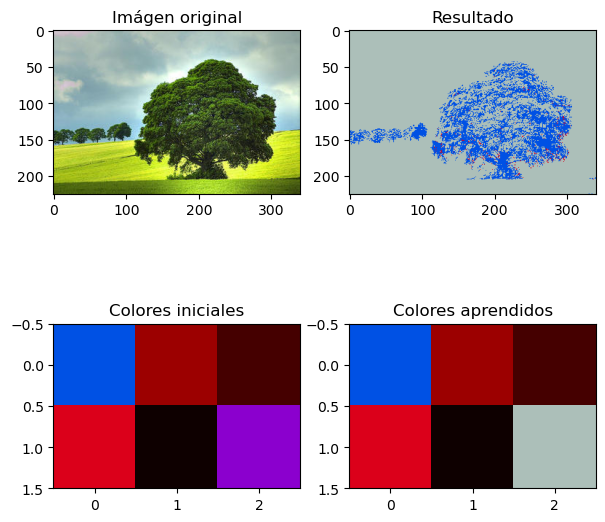

In [9]:
# Carga de librerías
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt

# Leer imagen original
img_original = plt.imread('s09_tree.jpg')

# Generando matriz 
# Tomamos los valores de pixeles de la imagen original (225 pixeles de alto, 340 pixeles de ancho, y 3 bandas de color)
# por lo tanto la imágen tiene 76500 pixeles por cada banda de color
# realiza una división entre 255 para normalizar los datos (un pixel puede tener un rango [0, 255])
pixels = np.reshape(img_original, (img_original.shape[0] * img_original.shape[1], 3)) / 255.

print(pixels.shape)

print("Training.....")
# Creamos un mallado de 2x3 con las tres bandas de color
# Es decir, vamos a tomar 6 (2x3) colores (combinando sus tres bandas RGB) 
som = MiniSom(
    2, # Filas
    3, # Columnas
    3, # Bandas de color
    sigma=1., # Define el alcance de la función de vecindad (https://github.com/JustGlowing/minisom/issues/61#issuecomment-684451727)
    learning_rate=0.2, # Tasa de aprendizaje inicial (que decrecerá conforme avanza el entrenamiento)
    neighborhood_function="bubble" # Función de vecindad
) 
# Cabe mencionar que dado que sigma es 1, en la función de vecindad "buble", solo se actualiza la neurona ganadora
# Aplicando una estategía "winner takes all" (Haykin 1999)
# Referencia https://github.com/JustGlowing/minisom/issues/61#issuecomment-579668225
# Esto hace sentido porque queremos mantener nuestros colores iniciales, y cuantificar los colores de la imágen

# Guarda pesos iniciales
pesos_iniciales = som.get_weights().copy() 

# Realizamos el entrenamiento en el que queremos modificar los colores de la imágen para que se "acerquen" 
# a los 6 colores iniciales
som.train(pixels, 10000, random_order=True, verbose=True)

print("Quantization...")
# Una vez realizado el entrenamiento de la red, y sabemos cuales son los colores de la imagen que más se parecen a 
# los colores iniciales, podemos realizar el proceso de cuantificación en el que se realiza un mapeo 
# de los colores de la imágen a los 6 colores iniciales.
qnt = som.quantization(pixels)

print("Building new image...")
# Creamos un arreglo del mismo tamaño de la imagen pero lo iniciamos en ceros (una imágen negra)
clustered = np.zeros(img_original.shape)

# Iteramos los calores cuantizados (almacenados en la variable qnt -> q)
for i, q in enumerate(qnt):  
    # Los asignamos en nuestro arreglo cluster
    clustered[np.unravel_index(i, shape=(img_original.shape[0], img_original.shape[1]))] = q

print("Done")

# mostrar resultado
plt.figure(figsize=(7,7))
plt.figure(1)
plt.subplot(221)
plt.title("Imágen original")
plt.imshow(img_original)
plt.subplot(222)
plt.title("Resultado")
plt.imshow(clustered)

plt.subplot(223)
plt.title("Colores iniciales")
plt.imshow(pesos_iniciales, interpolation="none")
plt.subplot(224)
plt.title("Colores aprendidos")
plt.imshow(som.get_weights(), interpolation="none")



## Input similiar

(76500, 3)
Training.....
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4694030521390601
Quantization...
Building new image...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done


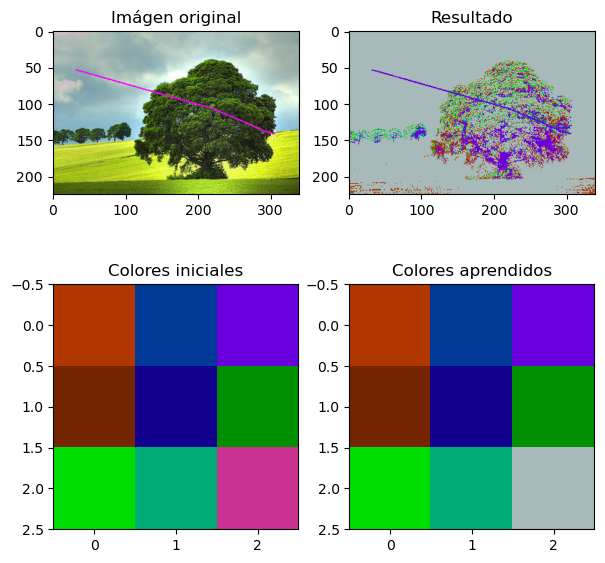

In [14]:
# Leer imagen modificada
img_original = plt.imread('s09_tree_modified.jpg')

pixels = np.reshape(img_original, (img_original.shape[0] * img_original.shape[1], 3)) / 255.

print(pixels.shape)

print("Training.....")
 
som = MiniSom(
    3, # Filas
    3, # Columnas
    3, # Bandas de color
    sigma=1., # Define el alcance de la función de vecindad (https://github.com/JustGlowing/minisom/issues/61#issuecomment-684451727)
    learning_rate=0.2, # Tasa de aprendizaje inicial (que decrecerá conforme avanza el entrenamiento)
    neighborhood_function="bubble" # Función de vecindad
) 

pesos_iniciales = som.get_weights().copy() 

som.train(pixels, 10000, random_order=True, verbose=True)

print("Quantization...")
qnt = som.quantization(pixels)

print("Building new image...")
clustered = np.ones(img_original.shape)

for i, q in enumerate(qnt):  
    clustered[np.unravel_index(i, shape=(img_original.shape[0], img_original.shape[1]))] = q

print("Done")


plt.figure(figsize=(7,7))
plt.figure(1)
plt.subplot(221)
plt.title("Imágen original")
plt.imshow(img_original)
plt.subplot(222)
plt.title("Resultado")
plt.imshow(clustered)

plt.subplot(223)
plt.title("Colores iniciales")
plt.imshow(pesos_iniciales, interpolation="none")
plt.subplot(224)
plt.title("Colores aprendidos")
plt.imshow(som.get_weights(), interpolation="none")



## Conclusiones
Dado que los valores iniciales son aleatorios no pude obtener exactamente el mismo resultado que el notebook de referencia, pero el procesamiento es el mismo.       
Para el input modificado realice dos cambios, agregue una línea de un color nuevo en la imagen, y cambie la dimensión de la red SOM, agregando más colores, de los cuales pude notar dos observaciones, el tener más colores posibles permite notar más texturas en la imágen (comparado con la versión de 6 colores) también me parece interesante que con los datos modificados, uno de los colores iniciales es un magenta similar al que utilize para editar la imágen, pero no fue de los colores aprendidos (cambiado por color girs), mi teoría es que este color es tan escaso, que no tuvo fuerza suficente para para ser aprendido, y el magenta de la imagén, termino agrupado con los azules (colores que también estan cerca en la escala de colores)